# Simplified Solow Model

### Matias Bayas-Erazo


The code generates and plots a time series of the simplified Solow model where the capital stock evolves according to:

\begin{equation}
k_{t+1} = s k_t^\alpha + (1-\delta) k_t
\end{equation}

Here $k_t$ is capital at time $t$, while $s, \alpha$, and $\delta$ are parameters that capture productivity, savings, and depreciation. For a given set of parameters the code:
1. Sets $k_0 = 1$
2. Iterates using the law of motion for capital.
3. Plots the resulting time series.

We begin by defining a function Solow_path that takes as arguments ax, parameters for the Solow model, and the desired time series length. The functions adds a time series path to the axes ax and includes a legend with the parameter values. 


In [ ]:
# Imports libraries used:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product


def Solow_path(ax, alphas, deltas, savings, T):
    
    """Add a time series path to the axes ax for given parameters"""
    k = np.empty(T)
    label = "$\\alpha = {},\; s = {},\; \\delta = {}$"

    
    for (alpha, delta, s) in product(alphas, deltas, savings):
        k[0] = 1
        i = 0
        while i < T-1:
            k[i+1] = s*k[i]**alpha + (1-delta)*k[i]
            i += 1 
        ax.plot(k, 'o-', lw = 2, label = label.format(alpha, s, delta))
    
    ax.grid(lw=0.2)
    ax.set_xlabel('Time')
    ax.set_ylabel('Capital')
    ax.set_ylim(0, 18)
    ax.legend(loc='upper left', frameon=True, fontsize=14)
    

With our function in hand, we can now create a figure with three subplots. In each subplot, we change the value of one of the three parameters while keeping the other two fixed. 

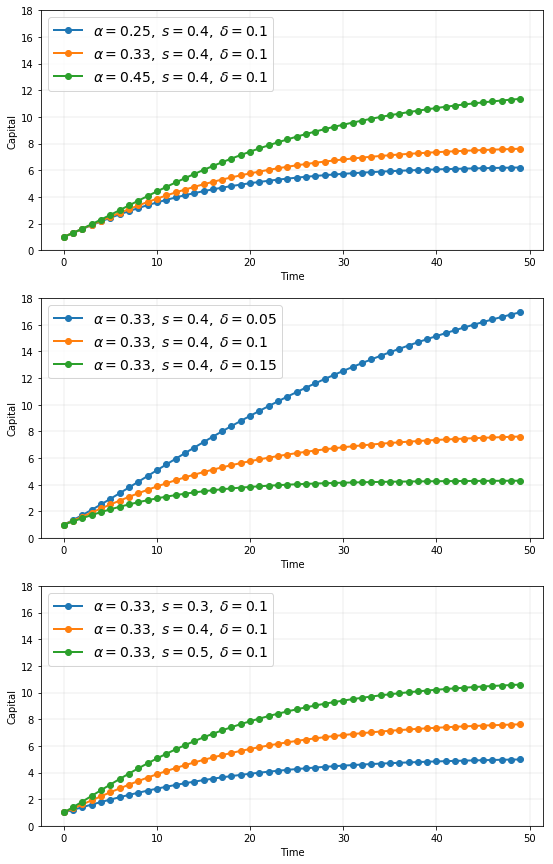

In [41]:
    
fig, axes = plt.subplots(3, 1, figsize=(9, 15))

# Parameters
T = 50
alphas = [0.25, 0.33, 0.45]
deltas = [0.05, 0.1, 0.15]
savings = [0.3, 0.4, 0.5]  


# Sets of parameters for each subplot
set_1 = [alphas, [deltas[1]], [savings[1]]]
set_2 = [[alphas[1]], deltas, [savings[1]]]
set_3 = [[alphas[1]], [deltas[1]], savings]
    
# Loop to plot each set of parameters
for ax, params in zip(axes, (set_1, set_2, set_3)):
    alphas, deltas, savings = params
    Solow_path(ax, alphas, deltas, savings, T)

plt.show()